In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings("ignore")


dados = pd.read_csv('/content/drive/MyDrive/comics_data.csv')

Visualizando os dados

In [2]:
dados.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
title,'Mazing Man,'Mazing Man,'Mazing Man,'Mazing Man,'Mazing Man
title_link,/series/4036/0/dc-comics-mazing-man,/series/4036/0/dc-comics-mazing-man,/series/4036/0/dc-comics-mazing-man,/series/4036/0/dc-comics-mazing-man,/series/4036/0/dc-comics-mazing-man
issue_link,https://comicbookrealm.com/series/4036/54341/d...,https://comicbookrealm.com/series/4036/54350/d...,https://comicbookrealm.com/series/4036/54351/d...,https://comicbookrealm.com/series/4036/54352/d...,https://comicbookrealm.com/series/4036/54342/d...
cover_link,/cover-scan/acb40c8a57d50781194e37be2a94b3d5/l...,/cover-scan/293f4e231eccb71ad6e6bc3fe3e49c4f/l...,/cover-scan/45c7a284efa7d07f7bb5c9afb3080ffd/l...,/cover-scan/21764f5da802b25622831976f1619aa4/l...,/cover-scan/3a4df503a1fb2450b1227f4c1f0c45d9/l...
issue,# 1,# 10,# 11,# 12,# 2
cover_date,Jan '86,Oct '86,Nov '86,Dec '86,Feb '86
cover_price,$0.75,$0.75,$0.75,$0.75,$0.75
current_value,$3.00,$3.00,$3.00,$4.00,$3.00
hist_prices_link,/comic.php?a=historical&comic=54341?keepThis=t...,/comic.php?a=historical&comic=54350?keepThis=t...,/comic.php?a=historical&comic=54351?keepThis=t...,/comic.php?a=historical&comic=54352?keepThis=t...,/comic.php?a=historical&comic=54342?keepThis=t...


In [3]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,461301.0,230650.000000,133166.272601,0.0,115325.0,230650.0,345975.0,461300.0
searched,461301.0,472.510892,1832.640726,0.0,46.0,119.0,343.0,224080.0
owned,461301.0,54.493832,157.031092,0.0,1.0,6.0,33.0,6478.0
pages,208011.0,53.804641,195.457862,0.0,32.0,32.0,36.0,75960.0
rating,461301.0,0.378575,1.217336,0.0,0.0,0.0,0.0,5.0
rating_count,461301.0,0.141645,0.582849,0.0,0.0,0.0,0.0,15.0
pub_id,461301.0,1389.146538,1766.452783,1.0,2.0,559.0,2960.0,8253.0
issues_total,456401.0,105.147651,215.981536,1.0,8.0,28.0,99.0,1801.0
pub_titles_total,461301.0,2039.691928,2620.827222,1.0,91.0,517.0,4688.0,7285.0
pub_issues_total,461301.0,20774.509437,25262.635323,0.0,811.0,6574.0,57043.0,65535.0


# DATA CLEANING

In [4]:
dados.drop(['Unnamed: 0','title_link','issue_link','cover_link','hist_prices_link'],axis=1,inplace=True)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461301 entries, 0 to 461300
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   title               461301 non-null  object 
 1   issue               461301 non-null  object 
 2   cover_date          369712 non-null  object 
 3   cover_price         461301 non-null  object 
 4   current_value       461301 non-null  object 
 5   searched            461301 non-null  int64  
 6   owned               461301 non-null  int64  
 7   pages               208011 non-null  float64
 8   rating              461301 non-null  float64
 9   rating_count        461301 non-null  int64  
 10  ISBN-UPC            197912 non-null  object 
 11  est_print_run       30446 non-null   object 
 12  variant_of          131457 non-null  object 
 13  preview             15563 non-null   object 
 14  synopsis            291190 non-null  object 
 15  contributors_names  461301 non-nul

Transformando os dados para possibilitar as analises

*   title: objeto -> string
*   cover_date: objeto -> data 
*   cover_price: objeto -> float
*   current_value: objeto -> float







In [6]:
dados['title'] = dados.title.astype(str)

In [7]:
dados['cover_date'] = dados['cover_date'].str.replace('\D+','a', regex=True)
dados['cover_date'] = dados['cover_date'].str.strip('a')

In [8]:
dados = dados[dados.cover_date.isin(['']) ==False]
dados.cover_date.unique()

array(['86', '2007', '22', '75', '76', nan, '06', '16', '07', '12', '08',
       '64', '65', '02', '00', '47', '49', '50', '51', '52', '53', '48',
       '54', '55', '56', '57', '58', '59', '60', '04', '19', '17', '18',
       '99', '14', '10', '11', '05', '15', '13', '09', '20', '21', '2003',
       '94', '38', '39', '46', '91', '87', '90', '82', '97', '40', '61',
       '62', '63', '41', '66', '67', '68', '69', '70', '71', '72', '73',
       '74', '42', '77', '78', '79', '80', '81', '83', '84', '43', '85',
       '88', '89', '92', '44', '93', '95', '96', '98', '01', '03', '45',
       '1937', '1942', '2000', '2002', '2004', '2006', '1944', '1945',
       '1943', '1991', '1977', '1973', '1994', '2018', '2010', '1996',
       '1988', '1997', '2005', '1990', '1993', '1999', '1995', '1998',
       '2001', '1992', '2019', '2008', '2009', '2015', '1981', '1966',
       '2012', '35', '1989', '1978', '2016', '1982', '2017', '1979',
       '1983', '1975', '1971', '2021', '37', '36', '1936', '

In [9]:
dados = dados[dados['cover_date'].notna()]
dados['cover_date'] = dados['cover_date'].astype(int)

In [10]:
dados['cover_date'] =  dados['cover_date'].apply(lambda x: x+2000 if 0 <= x < 23  else x)
dados['cover_date'] =  dados['cover_date'].apply(lambda x: x+1900 if 22 < x < 100 else x)
#dados['cover_date'] =  dados['cover_date'].apply(lambda x: 2022-x if x >= 0 else x)

In [11]:
dados.cover_date.unique()

array([1986, 2007, 2022, 1975, 1976, 2006, 2016, 2012, 2008, 1964, 1965,
       2002, 2000, 1947, 1949, 1950, 1951, 1952, 1953, 1948, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 2004, 2019, 2017, 2018, 1999, 2014,
       2010, 2011, 2005, 2015, 2013, 2009, 2020, 2021, 2003, 1994, 1938,
       1939, 1946, 1991, 1987, 1990, 1982, 1997, 1940, 1961, 1962, 1963,
       1941, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1942,
       1977, 1978, 1979, 1980, 1981, 1983, 1984, 1943, 1985, 1988, 1989,
       1992, 1944, 1993, 1995, 1996, 1998, 2001, 1945, 1937, 1935, 1936,
       1932, 1933, 1934, 1930, 1931])

In [12]:
dados['cover_price'] = dados['cover_price'].str.replace('$', '', regex=True)
dados['cover_price'] = dados['cover_price'].str.replace(',', '', regex=True)
dados['cover_price'] = dados['cover_price'].str.replace('Free', '0.00', regex=True)
dados['cover_price'] = dados.cover_price.astype(float)

In [13]:
dados['current_value'] = dados['current_value'].str.replace('$', '', regex=True)
dados['current_value'] = dados['current_value'].str.replace(',', '', regex=True)
dados['current_value'] = dados.current_value.astype(float) 

In [14]:
dados.reset_index(inplace = True)

In [15]:
dados.drop(['index'], axis = 1, inplace = True)

In [16]:
dados.query("pages > 10000 ")

,title,issue,cover_date,cover_price,current_value,searched,owned,pages,rating,rating_count,...,contributors_names,contributors_roles,characters,pub_id,volume,years,issues_total,pub_name,pub_titles_total,pub_issues_total
135293,Warhammer 40000: Marneus Calgar,# 1-2nd print,2021,4.99,5.0,319,0,75960.0,0.0,0,...,no contributors assigned,no contributors assigned,no characters assigned,2.0,NaN,2020 - 2021,14.0,Marvel Comics,7285,65535


In [17]:
dados['pages'].iloc[135293] = 128

In [18]:
dados['pages'].iloc[135293]

128.0

In [19]:
df1 = dados.copy()

O código abaixo, foi retirado de um notebook do kaggle. Manterei desta forma, pois não tenho expertisse suficiente ainda para usar regex dessa forma.  créditos: https://www.kaggle.com/iasonaskatechis/comic-data-cleaning-suggestion

In [20]:
prints = df1.issue.str.extract('.*(\d{1,2})[a-zA-Z]{2}[\s\-][pP]rint')
df1['print_nr'] = prints.fillna(1).astype(int)
# extract volume and issue information from issue of the type e.g. 'V5-14' or 'V9 6' or 'V12#6'
vols = (df1.issue.str.extractall('.*[Vv][oO]?[lL]?(\d+)[\s\-#]+(\d+)')
            .droplevel(1).rename({0: 'vol', 1: 'issue'}, axis=1))
# extract volume and issue information from issue of the type e.g. 'B-14' or 'C 6'
lett = df1.issue.str.extractall('([A-Z])[#\s\-](\d+)\s?.*').droplevel(1).rename({0: 'vol', 1: 'issue'}, axis=1)

In [21]:
# Find all ashcan issues
idx_ash = df1.issue.str.contains('[Aa]shcan')
# Find all non-numbered and ashcan issues
idx_nn = df1.issue.str.contains('(?:\s+|^)nn-?(?:\s*|$)')
df1.loc[idx_nn, 'volume'] = 'one-shot'
# Find all previews
idx_prev = df1.issue.str.contains('[Pp]review')
# find all issues that contain also the volume information
vols_idx = df1.issue.str.contains('.*[Vv][oO]?[lL]?#?\d+[\s\-#]+\d+')
# find issues that are properly numbered
numb_idx = df1.issue.str.contains('.*#\s*-?\d+\D*.*')
# find issues that are numbered as e.g. B-5 etc.
lett_idx = df1.issue.str.contains('^[A-Z][#\s\-]\d+\s?.*')
# find issues that are numbered by single capital letters
caplet_idx = df1.issue.str.contains('^[A-Z]$')
# find issues that are numbered by single lowercase letters
lowlet_idx = df1.issue.str.contains('^[a-z]$')
# find issues from free comic book day
fcbd_idx = df1.issue.str.contains('fcbd|free comic')
df1.loc[fcbd_idx, 'volume'] = 'fcbd'

# Extract issue numbers by the ones that are numbered in the conventional way
numbered = df1.issue.str.extract(r'#\s*(\d+)\D*')

# give numberical values to non-numbered special-type issues. This is just a convention
# ashcan --> -1
numbered.loc[idx_ash] = str(0)
# nn --> 1
numbered.loc[idx_nn] = str(1)
# preview --> 0.5
numbered.loc[idx_prev] = str(0.5)
# free comic book day (fcbd) --> 1
numbered.loc[fcbd_idx] = str(1)
# single capital letter numbering to int numbers
numbered.loc[caplet_idx] = df1[caplet_idx].issue.apply(lambda x: str(ord(x) - 64)).values.reshape(-1, 1)
# single lower letter numbering to int numbers
numbered.loc[lowlet_idx] = df1[lowlet_idx].issue.apply(lambda x: str(ord(x) - 96)).values.reshape(-1, 1)

# add volume and issue info extracted from issue column
numbered.loc[vols_idx, 0] = vols.issue 
df1.loc[vols_idx, 'volume'] = vols.vol
numbered.loc[lett_idx, 0] = lett.issue
df1.loc[lett_idx, 'volume'] = lett.vol.apply(lambda x: str(ord(x) - 64))

# create new column with the issues numbers
df1.insert(4, 'issue_nr', pd.to_numeric(numbered[0]))

In [22]:
# find all the above
regex = r'(?:\s+|^)nn-?(?:\s*|$)|.*#\s*-?\d+\D*.*|[Aa]shcan|[Pp]review|.*[Vv]\d+\s?-?\s?\d+|[A-Z][\s-]\d+\s?.*|^[A-Z]$|fcbd|free comic|^[a-z]$'
idx_good = (df1.issue.str.contains(regex))

In [23]:
# All that remained that we will drop since issue number is considered essential
print(df1[~idx_good].shape)
print(df1[~idx_good].current_value.sum())

(1315, 27)
45452.0


In [24]:
dados = df1.dropna(subset=['issue_nr'])
# drop issues with issue_nr > 10000 - considered outliers
dados = dados[~(dados.issue_nr > 10000)]

fim do codigo usado. 

In [25]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
cover_date,368201.0,1999.101738,21.591216,1930.0,1988.00,2007.00,2016.00,2022.0
cover_price,368201.0,4.603011,10.886459,0.0,0.25,2.99,3.99,1399.0
issue_nr,368201.0,51.951210,195.980108,0.0,2.00,5.00,27.00,9312.0
current_value,368201.0,120.736674,6068.848529,0.0,4.00,5.00,20.00,3000000.0
searched,368201.0,556.104011,2025.656608,0.0,57.00,149.00,420.00,224080.0
owned,368201.0,66.614496,173.320997,0.0,2.00,10.00,50.00,6478.0
pages,201979.0,52.566460,93.927223,0.0,32.00,32.00,36.00,8532.0
rating,368201.0,0.448865,1.312912,0.0,0.00,0.00,0.00,5.0
rating_count,368201.0,0.169147,0.635846,0.0,0.00,0.00,0.00,15.0
pub_id,368201.0,1226.027080,1673.677629,1.0,2.00,396.00,2914.00,8253.0


A partir dos dados já corrigidos podemos fazer algumas inferencias

1. Mais de 50% titulos forom publicados a partir de 2007, ou seja, mais de 150 mil publicações de menos de 15 anos. 
2. Podemos fazer uma linha do tempo com a evolução do preço(cover_price) de lançamento dos titulos. 
3. A variavel ratings(avaliações) possue muitos titulos com 0 de avaliações, o que demonstra que pode inferir que muitos titulos não são populares, e nem procurados. O que é corroborado pela variavel rating_counts(contagem de avaliações). Pois pelo menos de 75% da nosso conjunto de dados não tem sequer uma avaliação feita. Portanto, temos a possibilidade de excluir essa variavel de nossa analise a posterior. Podemos inferir que as avaliações nesse site não são muito utilizadas.
4. A variavel searched(buscas) pode ser utilizadas em analises variadas. 
5. current_value(valor atual) pode ser umas variavel alvo para um projeto de machine learning. Porem temos valores muito discrepantes. 
6. Owned(Donos) é a uma variavel a ser explorada, e que pode ter correlação com o valor atual.   

In [26]:
df_train2 = dados[['cover_price', 'current_value','cover_date', 'searched', 'owned', 'pages', 'issues_total','issue_nr']]

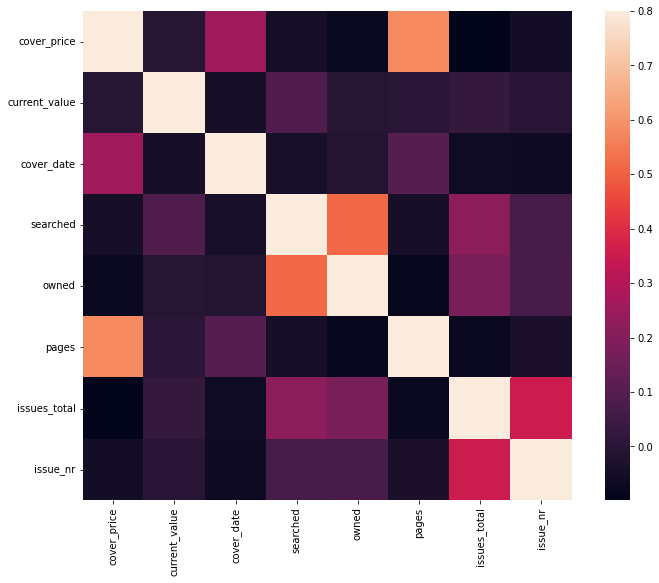

In [27]:
corrmat = df_train2.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [28]:
#utilizado quase como um group by
#posso fazer de forma diferente, ao inves de criar uma nova columa
#dados['title_issue'] = dados['title'] + ' ' + dados['issue']

In [29]:
#fazendo um groupby, para teste


Analisando os dados faltantes de todo o conjunto de dados

In [30]:
import missingno as msno

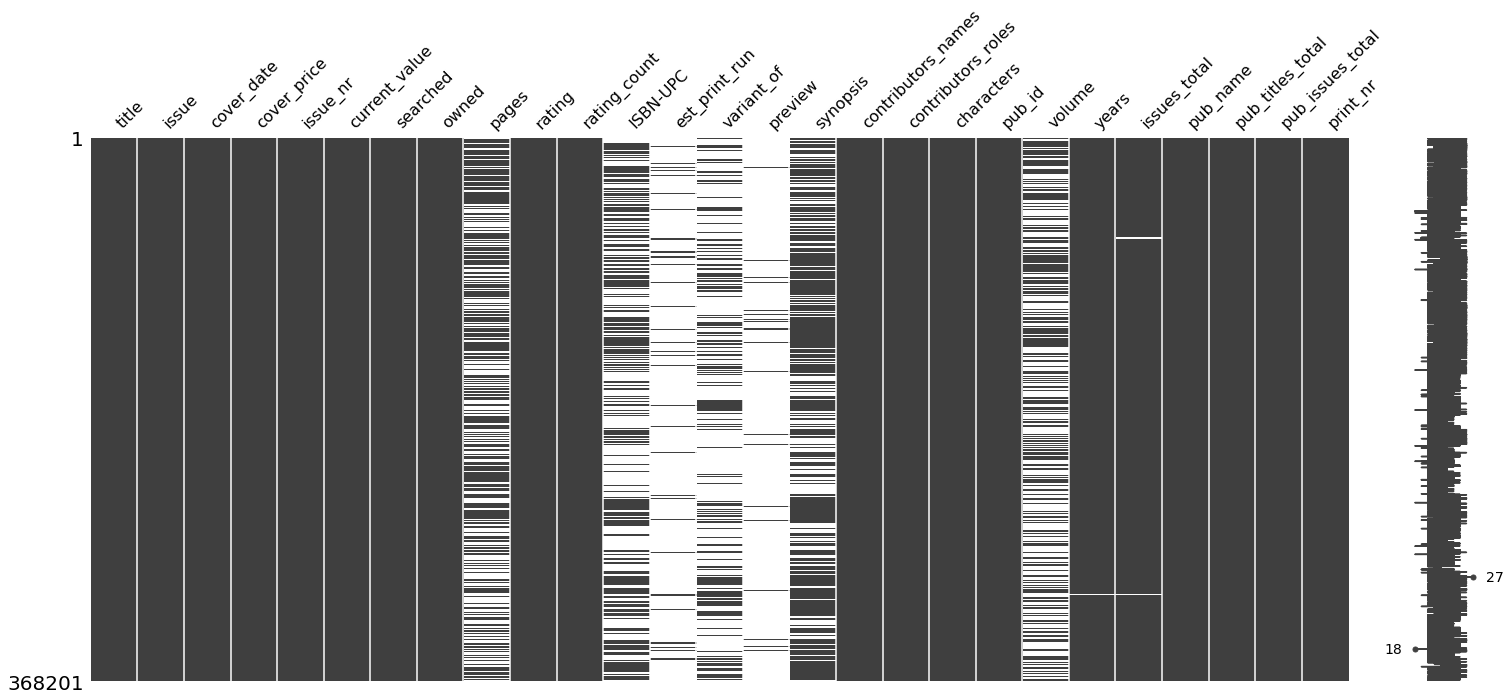

In [31]:
msno.matrix(dados);

Com isso podemos ter uma boa ideia do nosso conjunto de dados. 

1. as colunas de rating possuem valores zerados tanto para as colunas owned, rating, count_rating. E o que torna mais discrepante ainda é que no minimo 75% dos dados nas rating, count_rating são 0.

2. Vamos verificar a distribuição dos valores num histograma

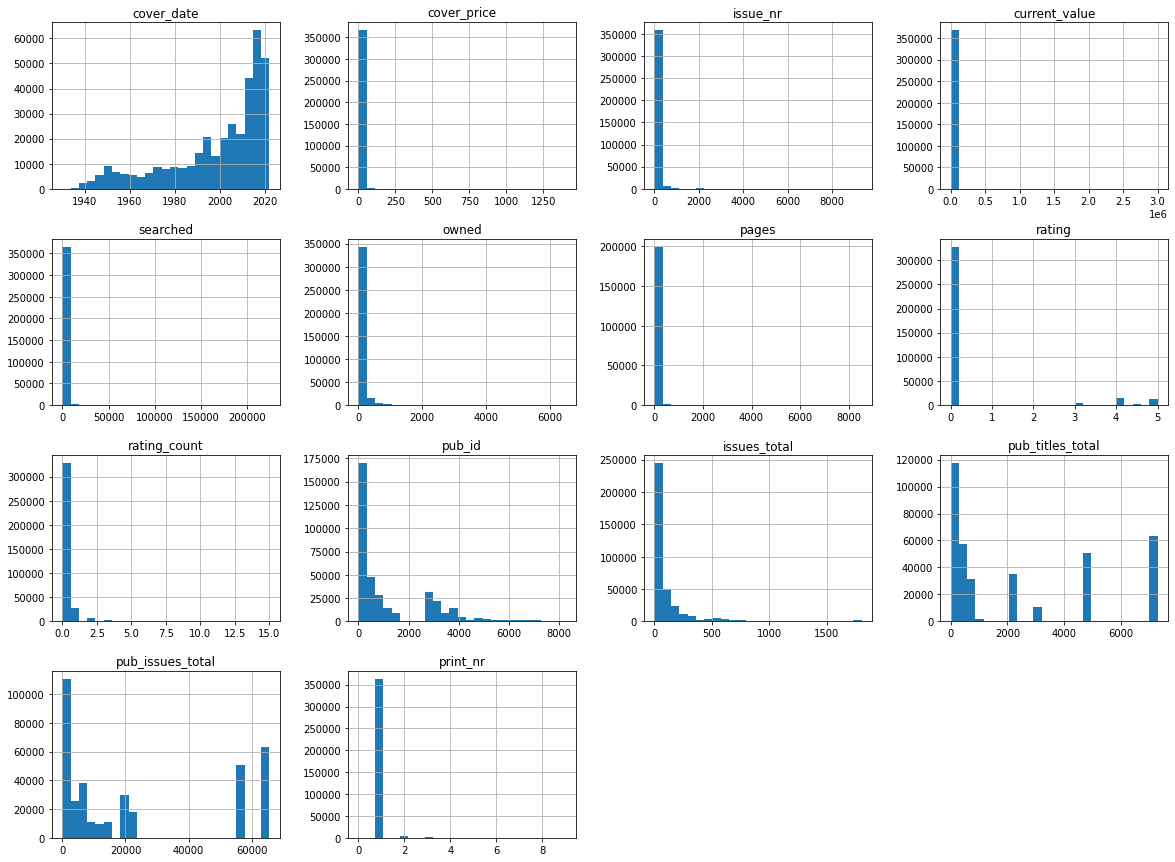

In [32]:
dados.hist(bins=25, figsize=(20,15));

# TITLE

In [33]:
contagem = dados.title.value_counts().to_frame().reset_index().iloc[:10]

In [34]:
contagem.head(3)

,index,title
0,Amazing Spider-Man,2300
1,March of Comics,1765
2,Batman,1727


In [35]:
contagem.columns = ['title', 'Contagem']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

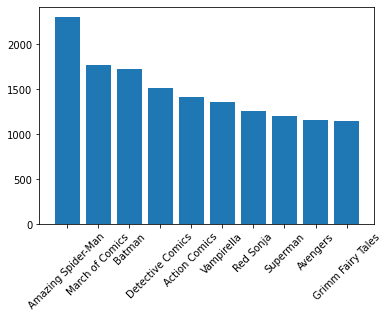

In [36]:
plt.bar(x=contagem['title'], height=contagem['Contagem'])
plt.xticks(rotation = 45)

# ISSUE

In [37]:
contagem_issue = dados.issue.value_counts().to_frame().reset_index().iloc[:10]

In [38]:
contagem_issue.columns = ['issue', 'Contagem']

In [39]:
contagem_issue.issue.unique()

array(['# 1', '# 2', '# 3', '# 4', '# 5', '# 1b', '# 6', '# 7', '# 8',
       '# 9'], dtype=object)

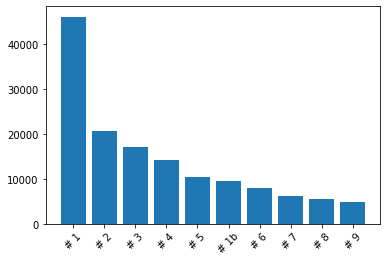

In [40]:
plt.bar(x=contagem_issue['issue'], height=contagem_issue['Contagem'])
plt.xticks(rotation = 45);

# COVER DATE

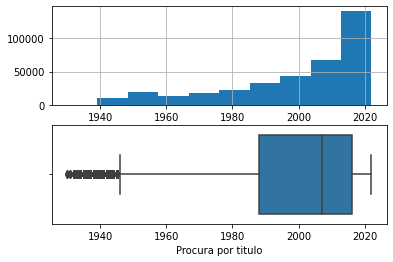

In [41]:
plt.subplot(2,1,1)
dados.cover_date.hist()

plt.subplot(2,1,2)
ax = sns.boxplot(x=dados.cover_date)
ax.set(xlabel="Procura por titulo")


plt.show()

# COVER PRICE

In [42]:
df = dados.copy()

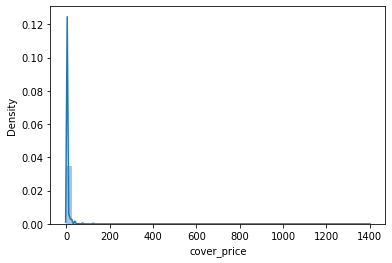

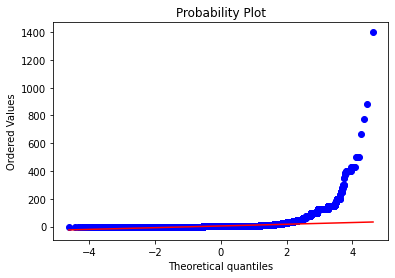

In [43]:
sns.distplot(dados['cover_price'], norm_hist= True)
fig = plt.figure()
res = stats.probplot(dados['cover_price'], plot=plt)

In [44]:
df['cover_price'] = np.log(df['cover_price'] + 1)

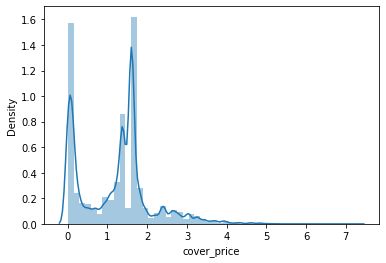

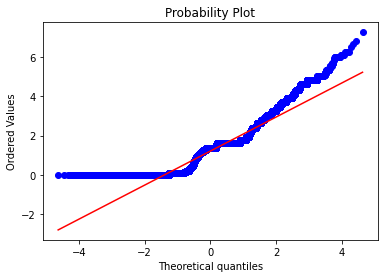

In [45]:
sns.distplot(df['cover_price'], norm_hist= True)
fig = plt.figure()
res = stats.probplot(df['cover_price'], plot=plt)

# CURRENT VALUE

In [46]:
dados.current_value.quantile(0.95)

225.0

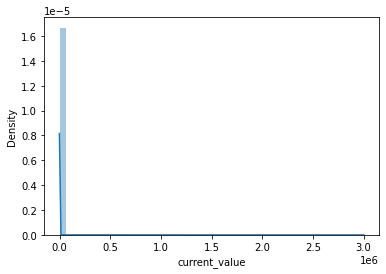

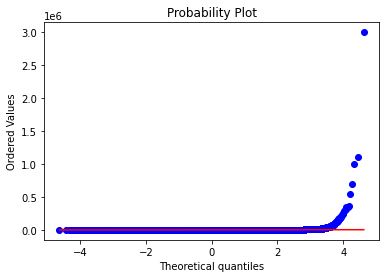

In [47]:
#histograma e grafico de probabilidade normal
sns.distplot(dados['current_value'], norm_hist= True)
fig = plt.figure()
res = stats.probplot(dados['current_value'], plot=plt)

In [48]:
df['current_value'] = np.log(df['current_value'] + 1)

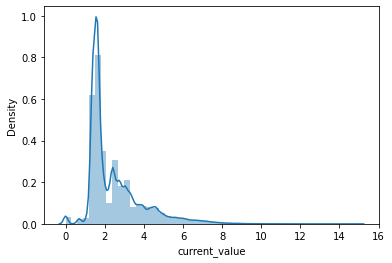

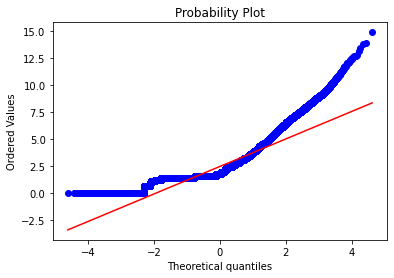

In [49]:
#histograma transformado e gráfico de probabilidade normal
sns.distplot(df['current_value'], norm_hist= True)
fig = plt.figure()
res = stats.probplot(df['current_value'], plot=plt)

# PAGES

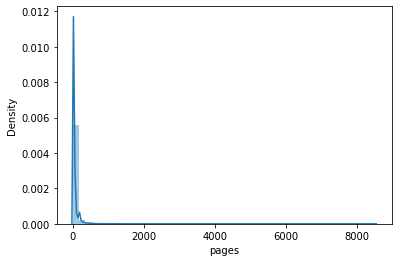

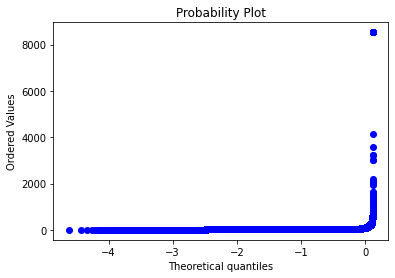

In [50]:
#histograma e grafico de probabilidade normal
sns.distplot(dados['pages'], norm_hist= True)
fig = plt.figure()
res = stats.probplot(dados['pages'], plot=plt)

In [51]:
df['pages'] = np.log(df['pages'] + 1)

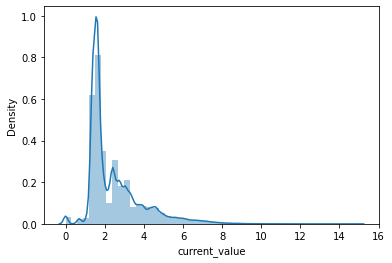

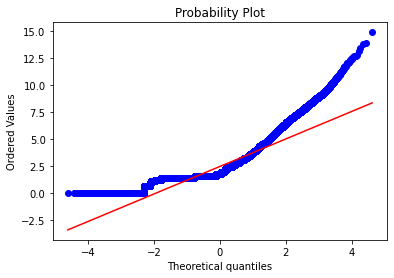

In [52]:
#histograma transformado e gráfico de probabilidade normal
sns.distplot(df['current_value'], norm_hist= True)
fig = plt.figure()
res = stats.probplot(df['current_value'], plot=plt)

In [53]:
dados.query('0 <= pages < 10' ).pages.count()

657

In [54]:
dados.pages.isnull().sum()

166222

## ANALISE DA VARIÁVEL RATING

tamanho da amostra: 368201


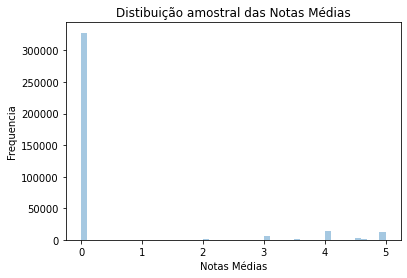

In [55]:
print('tamanho da amostra:', len(dados['rating']))
ax = sns.distplot(x=dados['rating'], kde = False)
ax.set(title = 'Distibuição amostral das Notas Médias', xlabel = 'Notas Médias', ylabel='Frequencia');

Percebemos uma quantidade muita grande de notas médias 0 que as outras notas. 

tamanho da amostra: 40041


[Text(0, 0.5, 'Frequencia'),
 Text(0.5, 0, 'Notas Médias'),
 Text(0.5, 1.0, 'Distribuição da amostra das notas médias maiores que zero')]

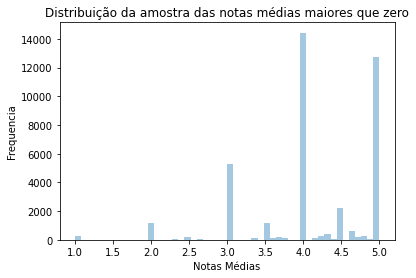

In [56]:
ratings_maior_zero = dados.query('rating > 0')
print('tamanho da amostra:',len(ratings_maior_zero.rating))
ax = sns.distplot(ratings_maior_zero.rating, kde = False)
ax.set(title='Distribuição da amostra das notas médias maiores que zero', ylabel = 'Frequencia', xlabel = 'Notas Médias')

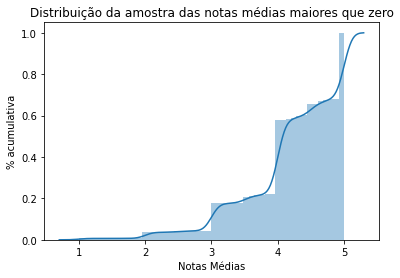

In [57]:
ax = sns.distplot(ratings_maior_zero.rating, hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True});
ax.set(title='Distribuição da amostra das notas médias maiores que zero', ylabel = '% acumulativa', xlabel = 'Notas Médias');

Podemos ter somente um voto para cada comics, vamos verificar quantos desses votos teve somente um votante. 

In [58]:
count_igual_1 = ratings_maior_zero.query('rating_count == 1')
count_maior_5 = ratings_maior_zero.query('rating_count >= 5')
print('receberam somente 1 review:', len(count_igual_1['rating_count']))
print('receberam mais que 4 reviews:', len(count_maior_5['rating_count']))
print('quantidade total dos que receperam pelo menos 1 review:', len(ratings_maior_zero))
print('------------------------------------------------------------------------------------------------------------')
print('quantidade de titulos que recebream mais que 1 review', 42284-29889)
print('quantidade que recebeu menos que 5 reviews:', 42284-1393)

receberam somente 1 review: 28106
receberam mais que 4 reviews: 1361
quantidade total dos que receperam pelo menos 1 review: 40041
------------------------------------------------------------------------------------------------------------
quantidade de titulos que recebream mais que 1 review 12395
quantidade que recebeu menos que 5 reviews: 40891


#SEARCHED

tamanho da amostra: 368201


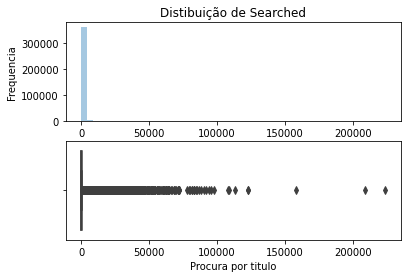

In [59]:
print('tamanho da amostra:', len(dados.searched))
plt.subplot(2,1,1)
ax = sns.distplot(x=dados.searched, kde=False);
ax.set(title = 'Distibuição de Searched',ylabel='Frequencia');

plt.subplot(2,1,2)
ax = sns.boxplot(x=dados.searched)
ax.set(xlabel="Procura por titulo")


plt.show()

A distribuição das vezes que um Comics foi pesquisado, parece possuir muitos valores proximos de zero, vamos verificar:

In [60]:
print('igual à 0:  ', dados.query("searched == 0").searched.count())
print('maior que 1:', dados.query("searched > 1").searched.count())
print('maior que 50:', dados.query("searched > 50").searched.count())
print('maior que 500:', dados.query("searched > 500").searched.count())
print('maior que 5000:', dados.query("searched > 5000").searched.count())
print('maior que 50000:', dados.query("searched > 50000").searched.count())
print('maior que 100000:', dados.query("searched > 100000").searched.count())

igual à 0:   52
maior que 1: 368004
maior que 50: 287162
maior que 500: 79549
maior que 5000: 5635
maior que 50000: 86
maior que 100000: 8


In [61]:
dados.searched.describe()

count    368201.000000
mean        556.104011
std        2025.656608
min           0.000000
25%          57.000000
50%         149.000000
75%         420.000000
max      224080.000000
Name: searched, dtype: float64

In [62]:
dados.searched.quantile(0.9)

1120.0

Vamos dar uma olhada nos top procurados de nosso conjunto de dados:

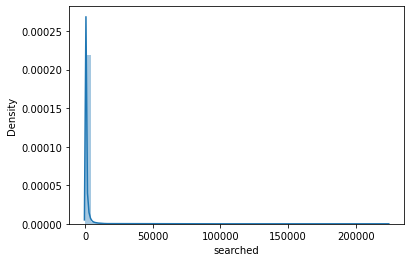

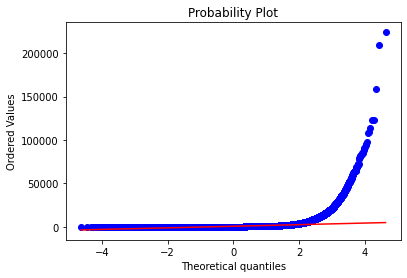

In [63]:
#histograma e grafico de probabilidade normal
sns.distplot(dados['searched'], norm_hist= True)
fig = plt.figure()
res = stats.probplot(dados['searched'], plot=plt)

Nossos dados possuem um alto grau de skewness, vamos transformar nossos dados usando a transformação logaritimica.

In [64]:
df['searched'] = np.log(df['searched'] + 1)

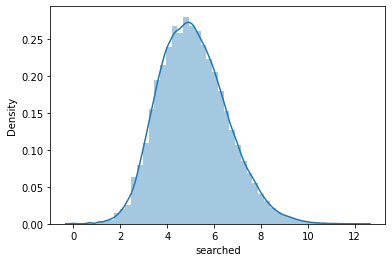

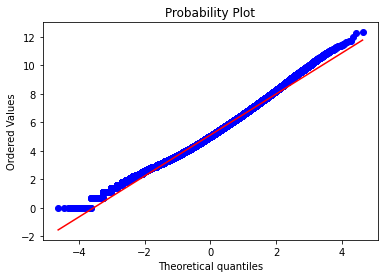

In [65]:
#histograma transformado e gráfico de probabilidade normal
sns.distplot(df['searched'], norm_hist= True)
fig = plt.figure()
res = stats.probplot(df['searched'], plot=plt)

# OWNED

In [66]:
dados.query('owned == 0').owned.count()

53604

Temos muitos titulos com nimguem reclamando que o pussui

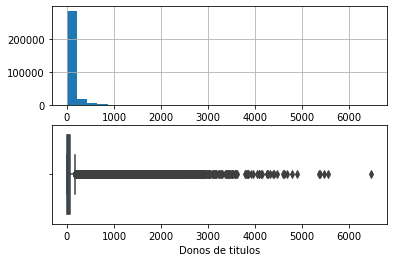

In [67]:
plt.subplot(2,1,1)
dados.query('owned > 0').owned.hist(bins=30)

plt.subplot(2,1,2)
ax = sns.boxplot(x=dados.query('owned > 0').owned)
ax.set(xlabel="Donos de titulos")


plt.show()

In [68]:
dados.sort_values(by = 'owned', ascending=False).query('owned > 0').owned.iloc[:20,]

154584    6478
133301    5564
138637    5478
138996    5393
139273    5358
2682      4903
139364    4789
124081    4681
139283    4627
138495    4626
139265    4600
134802    4467
133304    4395
155177    4381
133343    4324
138725    4281
139291    4258
155165    4252
137067    4154
123734    4132
Name: owned, dtype: int64

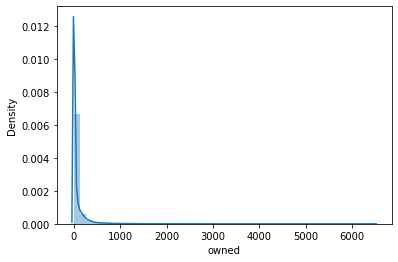

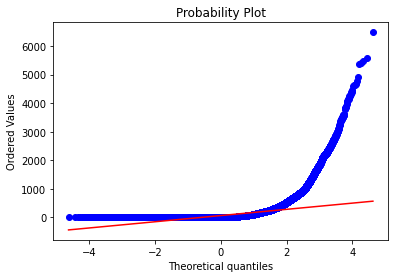

In [69]:
#histograma e grafico de probabilidade normal
sns.distplot(dados['owned'], norm_hist= True)
fig = plt.figure()
res = stats.probplot(dados['owned'], plot=plt)

In [70]:
df['owned'] = np.log(df['owned'] + 1)

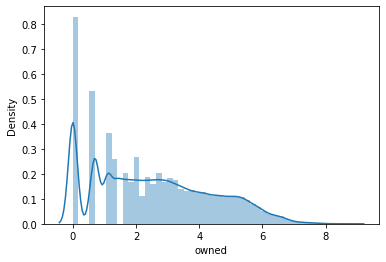

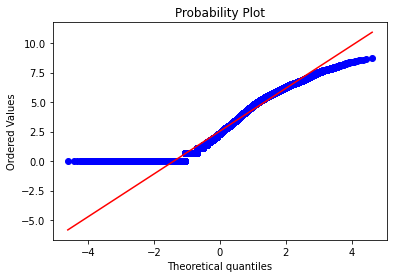

In [71]:
#histograma transformado e gráfico de probabilidade normal
sns.distplot(df['owned'], norm_hist= True)
fig = plt.figure()
res = stats.probplot(df['owned'], plot=plt)

# COMPARATIVO  (em progresso e alterações)

In [72]:
comparativo = dados[['title','issue','searched','owned','cover_date','current_value','pub_name',]]
comparativo['title_issue'] = comparativo['title'] + ' ' + comparativo['issue']
#comparativo['searched_x_owned'] = comparativo[]
comparativo.sort_values(by='owned', ascending=False)[:10]

,title,issue,searched,owned,cover_date,current_value,pub_name,title_issue
154584,Spawn,# 1,109188,6478,1992,30.0,Image Comics,Spawn # 1
133301,Uncanny X-Men,# 281,45325,5564,1991,5.0,Marvel Comics,Uncanny X-Men # 281
138637,X-Force,# 2,51642,5478,1991,8.0,Marvel Comics,X-Force # 2
138996,X-Men,# 1,86519,5393,1991,6.0,Marvel Comics,X-Men # 1
139273,X-Men,# 1c,62889,5358,1991,10.0,Marvel Comics,X-Men # 1c
2682,Adventures of Superman,# 500c,57030,4903,1993,5.0,DC Comics,Adventures of Superman # 500c
139364,X-Men,# 2,28842,4789,1991,5.0,Marvel Comics,X-Men # 2
124081,Spider-Man 2099,# 1,25994,4681,1992,45.0,Marvel Comics,Spider-Man 2099 # 1
139283,X-Men,# 1d,52327,4627,1991,6.0,Marvel Comics,X-Men # 1d
138495,X-Force,# 1,68644,4626,1991,6.0,Marvel Comics,X-Force # 1


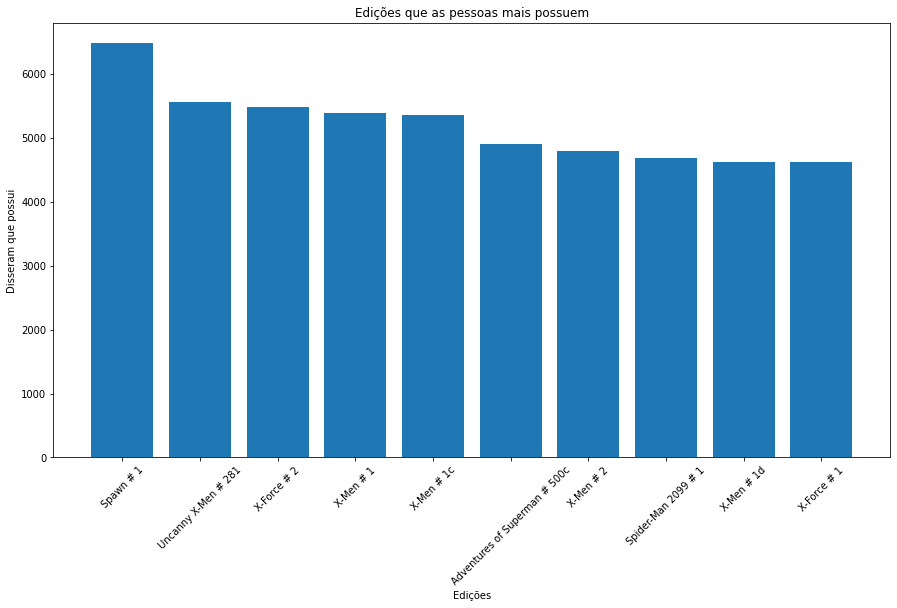

In [73]:
top_10_owned = comparativo[['title_issue','owned']]

plotar_top_10_owned = top_10_owned.sort_values(by= 'owned', ascending=False).iloc[:10,]

plt.figure(figsize= [15,8])
plt.bar(x = plotar_top_10_owned['title_issue'], height=plotar_top_10_owned.owned)
plt.xticks(rotation = 45)
plt.ylabel('Disseram que possui');
plt.xlabel('Edições');
plt.title('Edições que as pessoas mais possuem');

In [74]:
comparativo.sort_values(by='searched', ascending=False)[:10]

,title,issue,searched,owned,cover_date,current_value,pub_name,title_issue
139148,X-Men,# 141,224080,1507,1981,125.0,Marvel Comics,X-Men # 141
132981,Uncanny X-Men,# 142,209227,1719,1981,50.0,Marvel Comics,Uncanny X-Men # 142
81888,Amazing Spider-Man,# 361,158604,3174,1992,225.0,Marvel Comics,Amazing Spider-Man # 361
133277,Uncanny X-Men,# 266,122915,2493,1990,200.0,Marvel Comics,Uncanny X-Men # 266
81777,Amazing Spider-Man,# 300,122602,2403,1988,800.0,Marvel Comics,Amazing Spider-Man # 300
80968,Amazing Spider-Man,# 1,113520,175,1963,62000.0,Marvel Comics,Amazing Spider-Man # 1
154584,Spawn,# 1,109188,6478,1992,30.0,Image Comics,Spawn # 1
133217,Uncanny X-Men,# 221,108420,2583,1987,75.0,Marvel Comics,Uncanny X-Men # 221
133250,Uncanny X-Men,# 244,97897,2562,1989,55.0,Marvel Comics,Uncanny X-Men # 244
81600,Amazing Spider-Man,# 252b,95788,2078,1984,250.0,Marvel Comics,Amazing Spider-Man # 252b


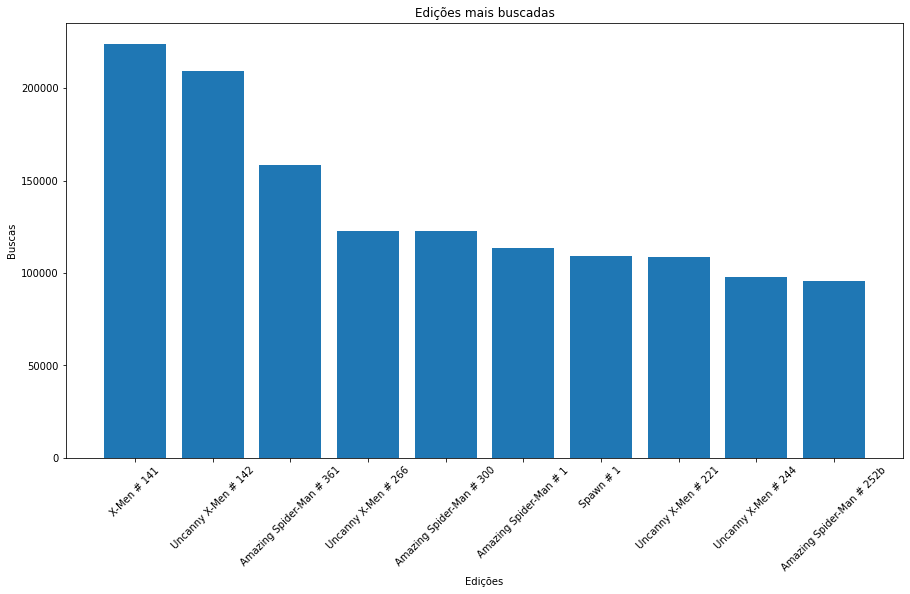

In [75]:
top_10 = comparativo[['title_issue','searched']]

plotar_top_10 = top_10.sort_values(by= 'searched', ascending=False).iloc[:10,]

plt.figure(figsize= [15,8])
plt.bar(x = plotar_top_10['title_issue'], height=plotar_top_10.searched)
plt.xticks(rotation = 45)
plt.ylabel('Buscas');
plt.xlabel('Edições');
plt.title('Edições mais buscadas');

Comics mais valiosos segundo nossos dados

In [76]:
comparativo.sort_values(by='current_value', ascending=False)[:10]

,title,issue,searched,owned,cover_date,current_value,pub_name,title_issue
261,Action Comics,# 1,63691,19,1938,3000000.0,DC Comics,Action Comics # 1
41123,Superman,# 1,24682,10,1939,1100000.0,DC Comics,Superman # 1
16721,Detective Comics,# 27,37656,11,1939,1000000.0,DC Comics,Detective Comics # 27
3079,All-American Comics,# 16,4485,6,1940,700000.0,DC Comics,All-American Comics # 16
5364,Batman,# 1,61085,20,1940,550000.0,DC Comics,Batman # 1
306027,Captain America Comics,# 1,5327,6,1941,365000.0,Timely Comics,Captain America Comics # 1
1268,Action Comics,# 7,13280,8,1938,340000.0,DC Comics,Action Comics # 7
80838,Amazing Fantasy,# 15,21278,74,1962,340000.0,Marvel Comics,Amazing Fantasy # 15
306233,Marvel Comics,# 1,5065,3,1939,320000.0,Timely Comics,Marvel Comics # 1
306234,Marvel Comics,# 1-2nd print,2137,0,1939,300000.0,Timely Comics,Marvel Comics # 1-2nd print


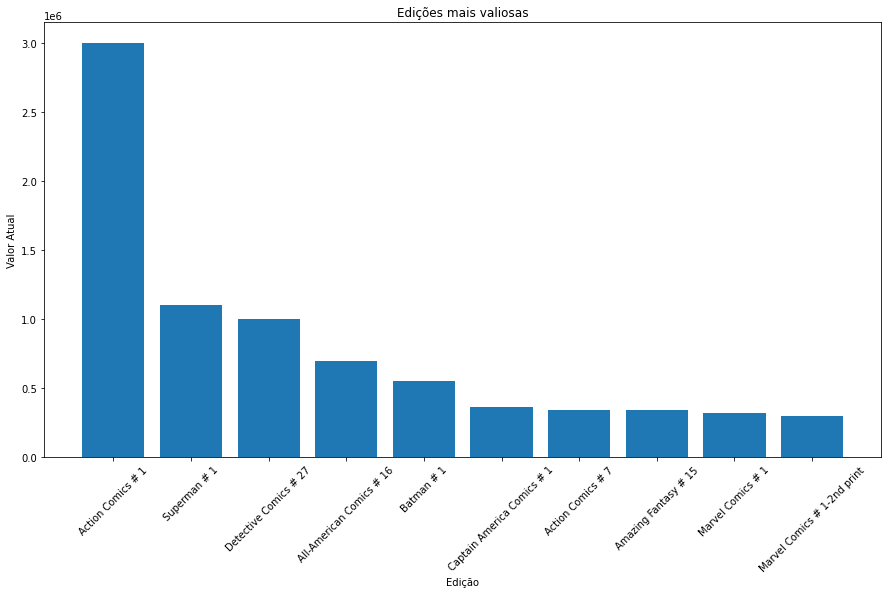

In [77]:
top_10_current_value = comparativo[['title_issue','current_value']]

plotar_top_10_current_value = top_10_current_value.sort_values(by= 'current_value', ascending=False).iloc[:10,]

plt.figure(figsize= [15,8])
plt.bar(x = plotar_top_10_current_value['title_issue'], height=plotar_top_10_current_value.current_value)
plt.xticks(rotation = 45)
plt.ylabel('Valor Atual');
plt.xlabel('Edição');
plt.title('Edições mais valiosas');

In [78]:
comparativo[['title', 'searched','owned','cover_date', 'current_value','pub_name']].sort_values(by='current_value', ascending = False).iloc[:10]

,title,searched,owned,cover_date,current_value,pub_name
261,Action Comics,63691,19,1938,3000000.0,DC Comics
41123,Superman,24682,10,1939,1100000.0,DC Comics
16721,Detective Comics,37656,11,1939,1000000.0,DC Comics
3079,All-American Comics,4485,6,1940,700000.0,DC Comics
5364,Batman,61085,20,1940,550000.0,DC Comics
306027,Captain America Comics,5327,6,1941,365000.0,Timely Comics
1268,Action Comics,13280,8,1938,340000.0,DC Comics
80838,Amazing Fantasy,21278,74,1962,340000.0,Marvel Comics
306233,Marvel Comics,5065,3,1939,320000.0,Timely Comics
306234,Marvel Comics,2137,0,1939,300000.0,Timely Comics


In [79]:
dados_finalizar = dados[['cover_date', 'current_value', 'searched', 'owned', 'issues_total','pub_issues_total']]

In [80]:
agrupado_title = dados.groupby('title')['searched', 'owned'].sum()

In [81]:
agrupado_title.reset_index(inplace=True)
agrupado_title_searched = agrupado_title.sort_values(by='searched', ascending=False).iloc[:10]

In [82]:
agrupado_title_searched

,title,searched,owned
1880,Amazing Spider-Man,14131271,804926
4352,Batman,7125555,540190
44402,Uncanny X-Men,5722109,674839
47412,X-Men,4254915,341822
3581,Avengers,3316312,347826
15015,Fantastic Four,2925224,318600
12265,Detective Comics,2818292,315485
42186,The Walking Dead,2671420,119497
36865,Spawn,2470223,199939
11088,Daredevil,2469091,292194


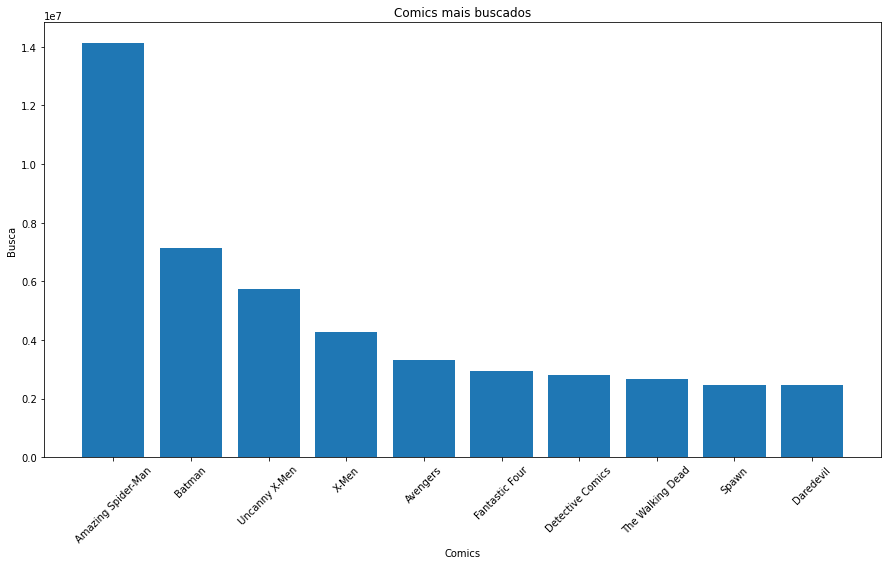

In [83]:
plt.figure(figsize= [15,8])
plt.bar(x = agrupado_title_searched['title'], height=agrupado_title_searched.searched)
plt.xticks(rotation = 45)
plt.ylabel('Busca');
plt.xlabel('Comics');
plt.title('Comics mais buscados');

In [84]:
agrupado_pub_name = dados.groupby('pub_name')['searched', 'owned'].sum()
agrupado_pub_name.reset_index(inplace=True)
agrupado_pub_name_searched = agrupado_pub_name.sort_values(by='searched', ascending=False).iloc[:10]

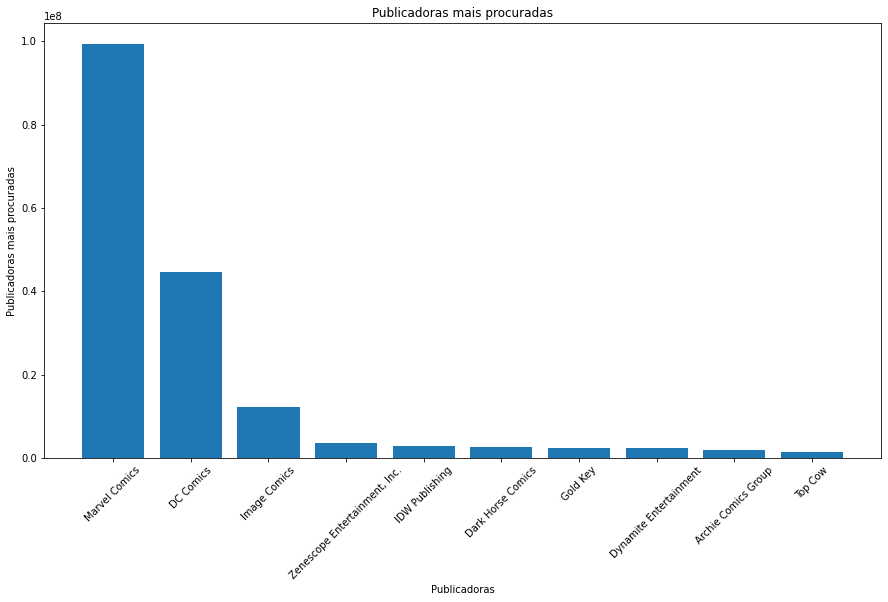

In [85]:
plt.figure(figsize= [15,8])
plt.bar(x = agrupado_pub_name_searched['pub_name'], height=agrupado_pub_name_searched.searched)
plt.xticks(rotation = 45)
plt.ylabel('Publicadoras mais procuradas');
plt.xlabel('Publicadoras');
plt.title('Publicadoras mais procuradas');

In [86]:
dados = dados[dados['issues_total'].notna()]

In [87]:
pd.isna(dados_finalizar).sum()

cover_date             0
current_value          0
searched               0
owned                  0
issues_total        3090
pub_issues_total       0
dtype: int64

In [88]:
corr_matrix = dados_finalizar.corr()
corr_matrix['current_value'].sort_values(ascending=False)

current_value       1.000000
searched            0.084548
issues_total        0.024081
pub_issues_total    0.005770
owned              -0.006023
cover_date         -0.044806
Name: current_value, dtype: float64

In [89]:
df.head()

,title,issue,cover_date,cover_price,issue_nr,current_value,searched,owned,pages,rating,...,contributors_roles,characters,pub_id,volume,years,issues_total,pub_name,pub_titles_total,pub_issues_total,print_nr
0,'Mazing Man,# 1,1986,0.559616,1.0,1.386294,7.138867,5.204007,3.496508,0.0,...,"['Pencils-CoverArt', 'Editor', 'Colors', 'Cove...","[[""'Mazing Man"", '/character-photos/character_...",1.0,NaN,1986,15.0,DC Comics,4688,57043,1
1,'Mazing Man,# 10,1986,0.559616,10.0,1.386294,5.209486,4.262680,NaN,0.0,...,no contributors assigned,no characters assigned,1.0,NaN,1986,15.0,DC Comics,4688,57043,1
2,'Mazing Man,# 11,1986,0.559616,11.0,1.386294,5.252273,4.189655,NaN,0.0,...,no contributors assigned,no characters assigned,1.0,NaN,1986,15.0,DC Comics,4688,57043,1
3,'Mazing Man,# 12,1986,0.559616,12.0,1.609438,6.508769,4.574711,3.135494,0.0,...,"['Inks', 'Scripts-CoverArt', 'Colors', 'CoverA...","[[""'Mazing Man"", '/character-photos/character_...",1.0,NaN,1986,15.0,DC Comics,4688,57043,1
4,'Mazing Man,# 2,1986,0.559616,2.0,1.386294,6.025866,4.779123,NaN,0.0,...,no contributors assigned,no characters assigned,1.0,NaN,1986,15.0,DC Comics,4688,57043,1


In [90]:
df['cover_date'] = np.log(df['cover_date'])

In [91]:
df['issues_total'] = np.log(df['issues_total'])

In [92]:
df['issue_nr'] = np.log(df['issue_nr']+1)

In [93]:
df_train = df[['cover_price', 'current_value','cover_date', 'searched', 'owned', 'pages', 'issues_total','issue_nr', ]]

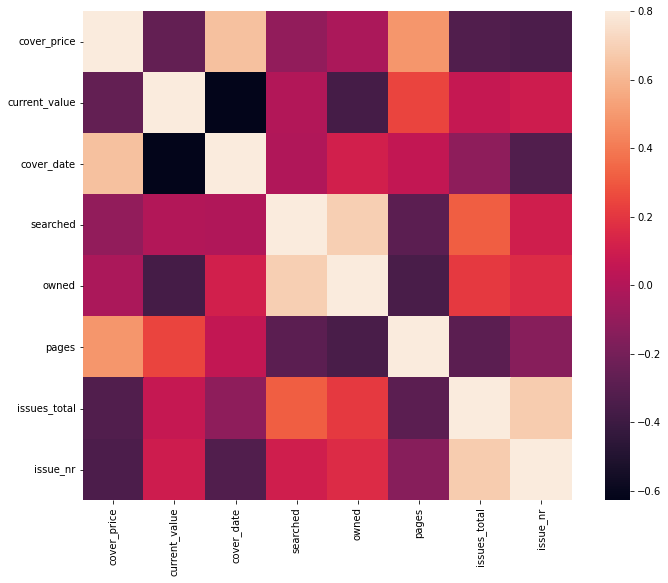

In [94]:
#matrix de correlação com os dados transformados
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

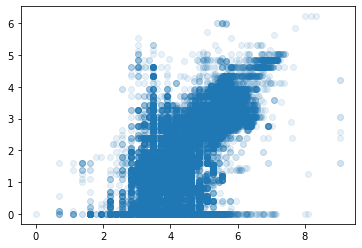

In [95]:
plt.scatter(x=df['pages'],y=df['cover_price'], alpha=0.1)

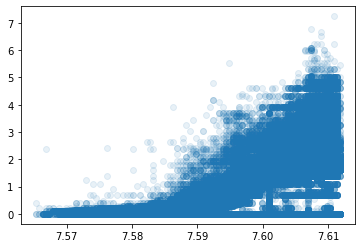

In [96]:
plt.scatter(x=df['cover_date'],y=df['cover_price'], alpha=0.1)

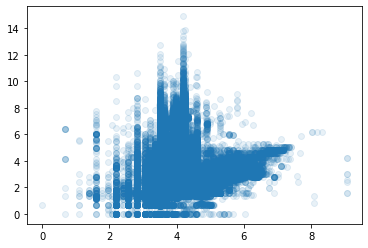

In [97]:
plt.scatter(x=df['pages'],y=df['current_value'], alpha=0.1)

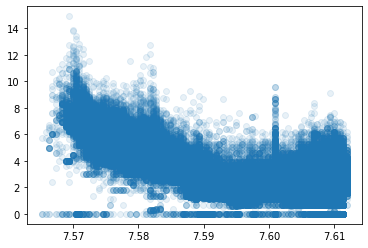

In [98]:
plt.scatter(x=df['cover_date'],y=df['current_value'], alpha=0.1)

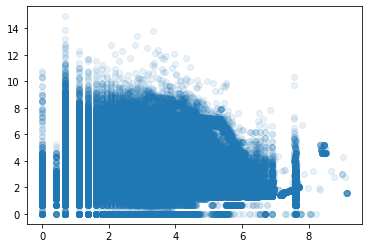

In [99]:
plt.scatter(x=df['issue_nr'],y=df['current_value'], alpha=0.1)

In [100]:
import xgboost
import math
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [102]:
dados_finalizar1 = df.copy()

In [103]:
X = dados_finalizar1[['cover_price','cover_date', 'searched','issue_nr']]

In [104]:
y = dados_finalizar1['current_value']

In [105]:
X.isnull().sum()

cover_price    0
cover_date     0
searched       0
issue_nr       0
dtype: int64

In [116]:
X.issue_nr.fillna(X.issue_nr.mean(), inplace=True)

In [117]:
Rscaler = preprocessing.RobustScaler()

In [261]:
robust_df = Rscaler.fit_transform(X)
robust_df = pd.DataFrame(robust_df, columns =['cover_price','cover_date', 'searched','issue_nr'])

In [262]:
robust_df.isnull().sum()

cover_price    0
cover_date     0
searched       0
issue_nr       0
dtype: int64

In [263]:
X_train, X_test, y_train, y_test = train_test_split(robust_df, y, test_size=0.3, random_state=101)

In [264]:
lm = LinearRegression()

In [265]:
lm.fit(X_train,y_train)

LinearRegression()

In [266]:
print(lm.intercept_)

2.10227200379451


In [267]:
lm.coef_

array([ 0.46114184, -1.44601275,  0.04513684, -0.21183982])

In [268]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

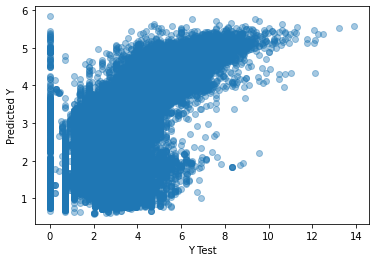

In [270]:
plt.scatter(y_test,predictions, alpha=0.4)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [114]:
from sklearn import metrics

In [272]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2 :'," ", metrics.r2_score(y_test,predictions))

MAE :   0.7901285971011125
MSE :   1.1159405835183147
RMAE :   1.0563808894136217
R2 :   0.43684490701688217


Usando XGboost

In [106]:
dados_finalizar2 = df.copy()

In [107]:
X2 = dados_finalizar2[['cover_price','cover_date', 'searched','issue_nr']]

In [108]:
y2 = dados_finalizar2['current_value']

In [118]:
X2.issue_nr.fillna(X2.issue_nr.mean(), inplace=True)

In [119]:
# Vamos tentar usar o algoritimo XGboost para ver se conseguimos melhores resultados
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [120]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=101)
xgb.fit(X_train2,y_train2)

[00:55:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=7, subsample=0.75)

In [121]:
predictions2 = xgb.predict(X_test2)
print(explained_variance_score(predictions2,y_test2))

0.7765122489670553


Text(0, 0.5, 'Predicted Y')

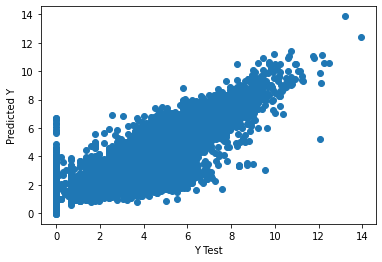

In [122]:
plt.scatter(y_test2,predictions2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [123]:
print('MAE :'," ", metrics.mean_absolute_error(y_test2,predictions2))
print('MSE :'," ", metrics.mean_squared_error(y_test2,predictions2))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test2,predictions2)))
print('R2 :'," ", metrics.r2_score(y_test2,predictions2))

MAE :   0.3572092558977274
MSE :   0.35755319142063235
RMAE :   0.5979575164011507
R2 :   0.8195621668977575
